# Review of scikit-learn API

# https://github.com/amueller/ml-workshop-3-of-4

# Exercise

Load the dataset ``data/bank-campaign.csv`` (you can find a description in data/bank-campaign-desc.txt).

This dataset is success of marketing a telephone bank marketing campaign. The goal is to predict the binary outcome "target", which is whether a client subscribed to a new product.

Split the data into a training and a test set using ``train_test_split``.
Use cross-validation to evaluate a RandomForestClassifier on the training part.
Then use ``GridSearchCV`` to adjust the parameters ``max_features`` and ``max_depth``.
Create a heat-map with the cross-validation results for the whole grid.

Bonus: Also plot the influence of ``max_depth`` on runtime.

In [21]:
# %load solutions/bank_campaign.py
import pandas as pd
data = pd.read_csv("data/bank-campaign.csv")
display(data.head())

y = data.target
X = data.drop("target", axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

print("label proportions:", y.value_counts() / len(y))


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,target
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no


label proportions: no     0.887346
yes    0.112654
Name: target, dtype: float64


In [22]:

# Get reasonable tree depth:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X_train, y_train)
# new in 0.21, use tree.tree_.max_depth in 0.20
print("Tree depth: ", tree.get_depth())#gives a rule of thumb of what some reasonable max depth is
print("n_features: ", X.shape[1])


Tree depth:  30
n_features:  63


In [23]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {'max_depth': [3, 5, 8, 10, 15, 20, 30],
              'max_features': [4, 8, 16, 20, 25, 40]}
grid = GridSearchCV(RandomForestClassifier(),
                    param_grid=param_grid)

# use [::10] to subsample by a factor of 10 for impatience
# could also have used StratifiedShuffleSplit(train_size=.1)
grid.fit(X_train[::10], y_train[::10])
#grid.score
v=grid.predict(X_test)
print(sum(v=='yes')/len(v))


res = pd.DataFrame(grid.cv_results_)
print(res.keys())
res_piv = pd.pivot_table(
    res, values='mean_test_score', index='param_max_depth',
    columns='param_max_features')

display(res_piv)

1030
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


param_max_features,4,8,16,20,25,40
param_max_depth,,,,,,
3,0.888673,0.894822,0.897087,0.899353,0.903883,0.914239
5,0.895146,0.899029,0.903560,0.905502,0.910680,0.914887
8,0.899029,0.902265,0.914563,0.915210,0.913592,0.915858
10,0.901294,0.904207,0.914563,0.913269,0.915858,0.915534
15,0.902589,0.908091,0.910356,0.912945,0.920065,0.918447
20,0.901942,0.905502,0.912945,0.912945,0.911974,0.917152
30,0.903560,0.908414,0.911327,0.911003,0.916505,0.913592


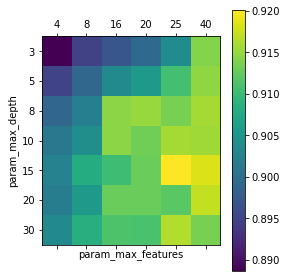

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.matshow(res_piv.values)
plt.xlabel(res_piv.columns.name)
plt.xticks(range(res_piv.shape[1]), res_piv.columns)
plt.ylabel(res_piv.index.name)
plt.yticks(range(res_piv.shape[0]), res_piv.index)
plt.colorbar()

0.10002913469942702
